In [ ]:


from matplotlib import pyplot as plt
# data = [(2, 2), (3, 2), (4, 1), (4, 0), (3, 0), (3, 1), (4, 2),
#         (4, 3), (4, 4), (3, 3), (3, 4), (2, 4), (2, 3), (1, 4),
#         (0, 4), (0, 3), (1, 3), (0, 2), (1, 2), (0, 1), (0, 0),
#         (1, 0), (1, 1), (2, 0), (2, 1)]

# data = np.asarray(data)
# print(data)

# # make axis equal and turn them off
# plt.axis('equal')
# plt.axis('off')

# for i in range(5):
#     # horizontal and vertical background lines
#     plt.plot([i,i], [0,4], linewidth=0.5, color='black')
#     plt.plot([0,4], [i,i], linewidth=0.5, color='black')
# plt.plot(data[:,0], data[:,1], 'b') # line segments  
# plt.scatter(data[:,0], data[:,1], c='b') # markers

# plt.show()

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
class node:
  def __init__(self,value,coordinates,neighbours=None,jumped=0,direction=""):
    self.value=value
    self.x=coordinates[0]
    self.y=coordinates[1]
    self.jumped=jumped
    self.direction=direction
    self.heuristic_value=-1
    self.distance_from_start=np.inf
    if neighbours is None:
      self.neighbours=[]
    else:
      self.neighbours=neighbours
    self.parent=None
  def has_neighbors(self):
    if len(self.neighbours) == 0:
      return False
    return True


  def number_of_neighbors(self):
    return len(self.neighbours)

  def add_neighboor(self, neighboor):
        """
            Add a new node to the neighboor list. In other words create a new connection between the
            current node and the neighboor
            Paramenters
            ----------
            neighboor : node
                Represent the node with which a new connection is created
        """
        self.neighbours.append(neighboor)
    

  def extend_node(self):
        """
            Extends the current node, creating and returning a list with all connected nodes
            Returns
            -------
                List
        """
        children = []
        for child in self.neighbours:
            children.append(child[0])
        return children
    

  def __gt__(self, other):

    if isinstance(other, node):
      if self.heuristic_value > other.heuristic_value:
        return True
      if self.heuristic_value < other.heuristic_value:
        return False
      return self.value > other.value
            

  def __eq__(self, other):

    if isinstance(other, node):
      return self.value == other.value
    return self.value == other


  def __str__(self):
        """
            Define that a node is printed with its value. 
            Returns
            -------
                str
        """
        return self.value

In [ ]:
class Graph:
    """ 
        This class used to represent the graph data structure.
        ...
        Attributes
        ----------
        nodes : list
            List with all the nodes of the graph
        ...
        Methods
        -------
        add_node(self, node) -> None
            Add a new node in the list of nodes
        find_node(self, value) -> Node
            Find and return the node of the graph with the given value.   
        add_edge(self, value1, value2, weight=1) -> None
            Add a new edge in the graph
        number_of_nodes(self) -> int
            Calculate and return the number of nodes of the graph
        are_connected(self, node_one, node_two) -> Boolean
            Check if the two given nodes are connected each other
        __str__(self) -> str
            Prints the nodes of the graph
    """
    def __init__(self, nodes=None):
        if nodes is None:
            self.nodes = []
        else:
            self.nodes = nodes


    def add_node(self, node):
        """
            Add a new node (vertex) in the grpah 
            Parameters
            ----------
                node: Node
                    Represent the nserted node in the graph
        """
        self.nodes.append(node)


    def find_node(self, value):
        """
            Return True if the node with the given value exist in the graph. Otherwise it return False
            Parameters
            ----------
                value: str
                    Is the value of the node we want to find
            ...
            Return
            ------
                Node
        """
        for node in self.nodes:
            if node.value == value:
                return node 
        return None


    def add_edge(self, value1, value2, weight=1):
        """
            Add a new edge between the two given nodes
            Parameters
            ----------
                value1: str
                    The value of the first node
                value2: str
                    The value of the second node 
                weight:
                    The weight of the edge. Default value 1
            ...
            Return
            ------
                Node
        """
        node1 = self.find_node(value1)        
        node2 = self.find_node(value2)

        if (node1 is not None) and (node2 is not None):
            node1.add_neighboor((node2, weight))
            node2.add_neighboor((node1, weight))
        else:
            print("Error: One or more nodes were not found")


    def number_of_nodes(self):
        """
            Return the number of nodes of the graph
            ...
            Return
            ------
                int
        """
        return f"The graph has {len(self.nodes)} nodes"


    def are_connected(self, node_one, node_two):
        """
            Return True if the given nodes are connected. Otherwise return False
            ...
            Parameters
            ----------
                node_one: str
                    The value of the first node
                node_two: str
                    The value of the second node
            Return
            ------
                Boolean
        """
        node_one = self.find_node(node_one)
        node_two = self.find_node(node_two)

        for neighboor in node_one.neighbours:
            if neighboor[0].value == node_two.value:
                return True
        return False


    def __str__(self):
        """""
            Define the way the nodes of graph will be printed. 
            Return
            ------
                str
        """
        graph = ""
        for node in self.nodes:
            graph += f"{node.__str__()}\n" 
        return graph

In [ ]:
def settingup():
# Create graph
    graph = Graph()
    # Add vertices
    graph.add_node(node('S', (1,4),direction="up"))
    graph.add_node(node('B', (2,4)))
    graph.add_node(node('C', (4,4)))
    graph.add_node(node('D', (1,3)))
    graph.add_node(node('E', (2,3)))
    graph.add_node(node('F', (3,3)))
    graph.add_node(node('G', (4,3)))
    graph.add_node(node('H', (1,2)))
    graph.add_node(node('I', (4,2)))
    graph.add_node(node('J', (1,1)))
    graph.add_node(node('K', (2,1)))
    graph.add_node(node('T', (3,1)))
    graph.add_node(node('L', (4,1)))
    graph.add_node(node('M', (2,2)))
    
    # Add edges
    graph.add_edge('S', 'B', 1)
    graph.add_edge('S', 'D', 1)
    graph.add_edge('B', 'E', 1)
    graph.add_edge('C', 'G', 1)
    graph.add_edge('D', 'E', 1)
    graph.add_edge('D', 'H', 1)
    graph.add_edge('E', 'F', 1)
    graph.add_edge('F', 'G', 1)
    graph.add_edge('G', 'I', 1)
    graph.add_edge('H', 'J', 1)
    graph.add_edge('I', 'L', 1)
    graph.add_edge('J', 'K', 1)
    graph.add_edge('K', 'T', 1)
    graph.add_edge('T', 'L', 1)
    graph.add_edge('H', 'M', 1)
    graph.add_edge('E', 'M', 1)
    graph.add_edge('M', 'K', 1)
    return graph

In [ ]:
class AStar:
  """
    This class used to represent the Greedy algorithm
    ...
    Attributes
    ----------
    graph : Graph
      Represent the graph (search space of the problem) 
    start : str
      Represent the starting point 
    target : str
      Represent the destination (target) node
    opened : list
      Represent the list with the available nodes in the search process
    closed : list
      Represent the list with the closed (visited) nodes
    number_of_steps : int
      Keep the number of steps of the algorithm
    ...
    Methods
    -------
    manhattan_distance(self, node1, node2) -> int
      Calculate the manhattan distance between the two given nodes  
    calculate_heuristic_value(self, parent, child, target) -> int
      Calculate the heuristic value of the node (child)
    calculate_distance(self, parent, child) -> int
      Calculate the distance from the initial node to the child node
    insert_to_list(self, list_category, node) -> None
      Insert a new node either ot opened or to closed list according to list_category parameter 
    remove_from_opened(self) -> Node
      Remove from the opened list the node with the smallest heuristic value
    opened_is_empty(self) -> Boolean
      Check if the opened list is empty or not
    get_old_node(self, node_value) -> Node
      Return the node from the opened list in case of a new node with the same value
    calculate_path(self, target_node) -> list
      Calculate and return the path from the stat node to target node
    calculate_cost(self, path) -> int
      Calculate and return the total cost of the path
    search(self)
        Implements the core of algorithm. This method searches, in the search space of the problem, a solution 
    """

  def __init__(self, graph, start_position, target):
    self.graph = graph
    self.start = graph.find_node(start_position)
    self.target = graph.find_node(target)
    self.opened = []
    self.closed = []
    self.number_of_steps = 0


  def manhattan_distance(self, node1, node2):
    """
      Calculate and return the manhattan_distance between the two given nodes
      Parameters
      ----------
      node1 : Node
        Represent the first node 
      node2 : Node
        Represent the second node
      ...
      Return 
      ------
        int
    """
    return abs(node1.x - node2.x) + abs(node1.y - node2.y)


  def calculate_distance(self, parent, child):
    """
      Calculate and return the distance from the start to child node. If the heuristic value has already calculated
      and is smaller than the new value, the method return theold value. Otherwise the method return the new value
      and note the parent as the parent node of child
      Parameters
      ----------
      parent : Node
        Represent the parent node
      child : Node
        Represent the child node
      ...
      Return 
      ------
        int
    """
    for neighbours in parent.neighbours:
      if neighbours[0] == child:
        distance = parent.distance_from_start + neighbours[1]
        if distance < child.distance_from_start:
          child.parent = parent
          return distance
        
        return child.distance_from_start


  def calculate_heuristic_value(self, parent, child, target):
    """
      Calculate and return the heuristic value of a node which is the sum of the 
      manhattan distance to the target node and the distance from the initial node
      ...
      Parameters
      ----------
        parent : Node
          Represent the selected node
        child : Node
          Represent the child of the selected node
        target : Node
          Represent final state of the problem
      Returns
      -------
        int
    """
    return self.calculate_distance(parent, child) + self.manhattan_distance(child, target)
    
  
  def insert_to_list(self, list_category, node):
    """
      Insert a node in the proper list (opened or closed) according to list_category
      Parameters
      ----------
      list_category : str
          Determines the list in which the node will be appened. If the value is 'open' 
          the node is appended in the opened list. Otherwise, the node is appended in the closed list
      node : Node
          The node of the problem that will be added to the frontier
    """
    if list_category == "open":
      self.opened.append(node)
    else:
      self.closed.append(node)
  

  def remove_from_opened(self):
    """
      Remove the node with the smallest heuristic value from the opened list
      Then add the removed node to the closed list
      Returns
      -------
        Node
    """
    self.opened.sort()
    # for n in self.opened:
    #   print(f"({n},{n.heuristic_value})", end = " ")
    # print("\n")
    node = self.opened.pop(0)
    self.closed.append(node)
    return node


  def opened_is_empty(self):
    """
      Check if the the list opened is empty, so no solution found
      Returns
      -------
      Boolean
        True if the list opened is empty
        False if the list opened is not empty
    """
    return len(self.opened) == 0


  def get_old_node(self, node_value):
    """
      Return the node with the given value from the opened list,
      to compare its heuristic_value with a node with the same value
      ...
      Parameters
      ----------
        node_value : Node
        Represent the value of the node
      Returns
      -------
        Node
    """
    for node in self.opened:
      if node.value == node_value:
        return node
    return None 
      

  def calculate_path(self, target_node):
    """
      Calculate and return the path (solution) of the problem
      ...
      Parameters
      ----------
        target_node : Node
        Represent final (destination) node of the problem
      Returns
      -------
        list
    """
    path = [target_node.value]
    node = target_node.parent
    while True:
      path.append(node.value)
      if node.parent is None:
        break
      node = node.parent
    return path


  def calculate_cost(self, path):
    """
      Calculate and return the total cost of the path
      ...
      Parameters
      ----------
        path : List
        Contains all the nodes of the path from the target node to the initial node
      Returns
      -------
        int
    """
    total_cost = 0
    for i in range(len(path) - 1):
      child = self.graph.find_node(path[i])
      parent = self.graph.find_node(path[i+1])
      
      for neighbours in child.neighbours:
        # Structure of neighbor(Node, weight)
        if neighbours[0] == parent:
          total_cost += neighbours[1]

    return total_cost
      

  def search(self):
    """
      Is the main algorithm. Search for a solution in the solution space of the problem
      Stops if the opened list is empty, so no solution found or if it find a solution. 
      ...
      Return
      ------
        list
    """
    # Calculate the heuristic value of the starting node
    # The distance from the starting node is 0 so only manhattan_distance is calculated
    self.start.distance_from_start = 0
    self.start.heuristic_value = self.manhattan_distance(self.start, self.target)
    # Add the starting point to opened list
    self.opened.append(self.start)

    while True:
      self.number_of_steps += 1

      if self.opened_is_empty():
        print(f"No Solution Found after {self.number_of_steps} steps!!!")
        break
        
      selected_node = self.remove_from_opened()
      # print(f"Selected Node {selected_node} has parent {selected_node.parent}")
      # check if the selected_node is the solution
      if selected_node == self.target:
        path = self.calculate_path(selected_node)
        total_cost = self.calculate_cost(path)
        path.reverse()
        return path, total_cost

      # extend the node
      new_nodes = selected_node.extend_node()

      # add the extended nodes in the list opened
      if len(new_nodes) > 0:
        for new_node in new_nodes:
          
          new_node.heuristic_value = self.calculate_heuristic_value(selected_node, new_node, self.target)
          if new_node not in self.closed and new_node not in self.opened:
            new_node.parent = selected_node
            self.insert_to_list("open", new_node)
          elif new_node in self.opened and new_node.parent != selected_node:
            old_node = self.get_old_node(new_node.value)
            if new_node.heuristic_value < old_node.heuristic_value:
              new_node.parent = selected_node
              self.insert_to_opened(new_node)

In [ ]:
import random
def createpathlist(startnode,openlist,weight1,weight2,graph):
  closelist=[]
  currentnode=startnode
  closelist.append(currentnode)
  while len(openlist)!=len(closelist):
    if currentnode.has_neighbors:
      a=random.random()
      b=random.random()
      neightboropenlist=[]
      neightboropenlist=[item[0] for item in currentnode.neighbours if item[0] not in closelist]
      if neightboropenlist!=[]:
        if len(neightboropenlist)==1:
          currentnode=neightboropenlist[0]
          closelist.append(currentnode)

        elif a>weight1 and b >weight2 and len(neightboropenlist)>1:

          currentnode=neightboropenlist[1]
          closelist.append(currentnode)

        elif a>weight1 and len(neightboropenlist)>2:

          currentnode=neightboropenlist[2]
          closelist.append(currentnode)

        elif b>weight2 and len(neightboropenlist)>3:

          currentnode=neightboropenlist[3]
          closelist.append(currentnode)

        else:
          currentnode=neightboropenlist[0]
          closelist.append(currentnode)

      else:
        remainopen=[item for item in openlist if item not in closelist]
        currentnode=remainopen[0]
        currentnode.jumped=1
        closelist.append(currentnode)


  return closelist

In [ ]:
def calculatecommand(currentnode,nextnode,graph,astarmode,valuelist):
  listofcommand=[]
  if nextnode.jumped==0 or astarmode==1:
    if currentnode.x-nextnode.x!=0:
      if currentnode.direction=="up":

        if currentnode.x-nextnode.x>0:
          listofcommand=listofcommand +["turnL","Forward"]
          nextnode.direction="left"
        else:
          listofcommand=listofcommand +["turnR","Forward"]
          nextnode.direction="right"
      if currentnode.direction=="down":
        if currentnode.x-nextnode.x>0:
          listofcommand=listofcommand +["turnR","Forward"]
          nextnode.direction="left"
        else:
          listofcommand=listofcommand +["turnL","Forward"]
          nextnode.direction="right"
      if currentnode.direction=="right":
        if currentnode.x-nextnode.x>0:
          listofcommand=listofcommand +["turnR","turnR","Forward"]
          nextnode.direction="left"
        else:
          listofcommand=listofcommand +["Forward"]
          nextnode.direction="right"
      if currentnode.direction=="left":
        if currentnode.x-nextnode.x>0:
          listofcommand=listofcommand +["Forward"]
          nextnode.direction="left"
        else:
          listofcommand=listofcommand +["turnR","turnR","Forward"]
          nextnode.direction="right"
    elif currentnode.y-nextnode.y!=0:
      if currentnode.direction=="up":
        if currentnode.y-nextnode.y>0:
          listofcommand=listofcommand +["turnR","turnR","Forward"]
          nextnode.direction="down"
        else:
          listofcommand=listofcommand +["Forward"]
          nextnode.direction="up"
      if currentnode.direction=="down":
        if currentnode.y-nextnode.y>0:
          listofcommand=listofcommand +["Forward"]
          nextnode.direction="down"
        else:
          listofcommand=listofcommand +["turnR","turnR","Forward"]
          nextnode.direction="up"
      if currentnode.direction=="left":
        if currentnode.y-nextnode.y>0:
          listofcommand=listofcommand +["turnL","Forward"]
          nextnode.direction="down"
        else:
          listofcommand=listofcommand +["turnR","Forward"]
          nextnode.direction="up"
      if currentnode.direction=="right":
        if currentnode.y-nextnode.y>0:
          listofcommand=listofcommand +["turnR","Forward"]
          nextnode.direction="down"
        else:
          listofcommand=listofcommand +["turnL","Forward"]
          nextnode.direction="up"
  else:
    graph2=settingup()
    alg=AStar(graph2,currentnode.value,nextnode.value)
    #nextnode.jumped=0
    path, path_length = alg.search()
    jumplist=[]
    for x in path:
      jumplist.append(graph.find_node(x))
    j=1
    commlist=[]
    while j<len(jumplist):
      current=jumplist[j-1]
      next=jumplist[j]
      commlist=commlist+calculatecommand(current,next,graph,1,valuelist)
      j=j+1
    listofcommand=commlist

  return listofcommand

In [ ]:
def listtorder(pathlist,graph,valuelist):
  x=1
  commandlist=[]

  while x<len(pathlist):
    currentnode=pathlist[x-1]
    nextnode=pathlist[x]
    commandlist=commandlist+calculatecommand(currentnode,nextnode,graph,0,valuelist)
    x=x+1

  return commandlist


In [ ]:
def calculatedistance(commandlist):
  distance=len(commandlist)
  return distance

In [ ]:
def drawGraph(A):
    tryAData = []
    jumpedList = []
    for i in range (len(A)):
      print(A[i].x,A[i].y,A[i].jumped)
      tryAData.append([A[i].x,A[i].y])
      if A[i].jumped == 1:
        jumpedList.append([A[i].x,A[i].y])

    tryAData = tuple(tryAData)
    tryAData = np.asarray(tryAData)
    jumpedList = tuple(jumpedList)
    jumpedList = np.asarray(jumpedList)
    for i in range(1,5):
          # horizontal and vertical background lines
          plt.title('Start from Red Dot')
          plt.plot([i,i], [1,4], linewidth=0.5, color = 'black')
          plt.plot([1,4], [i,i], linewidth=0.5, color = 'black')
          plt.plot(tryAData[:,0], tryAData[:,1], '#9467bd') # line segments
          plt.scatter(tryAData[:,0], tryAData[:,1], c = 'b') # markers
          
          plt.scatter(1,4, c = 'r',alpha = 1) #indicate the start point
          if len(jumpedList) > 0:
               plt.scatter(jumpedList[:,0], jumpedList[:,1], c = 'green')

    plt.savefig('ha.png')

25
1 4 0
2 4 0
2 3 0
1 3 0
1 2 0
1 1 0
2 1 0
3 1 0
4 1 0
4 2 0
4 3 0
4 4 0
3 3 1
2 2 1
S
B
E
D
H
J
K
T
L
I
G
C
F
M
['turnR', 'Forward', 'turnR', 'Forward', 'turnR', 'Forward', 'turnL', 'Forward', 'Forward', 'turnL', 'Forward', 'Forward', 'Forward', 'turnL', 'Forward', 'Forward', 'Forward', 'turnR', 'turnR', 'Forward', 'turnR', 'Forward', 'Forward', 'turnL', 'Forward']


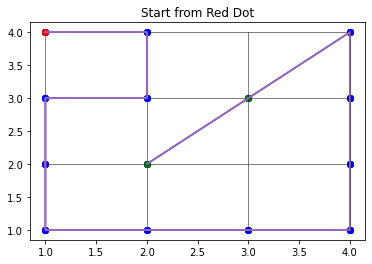

In [ ]:
def run():
    graph = settingup()
    # Execute the algorithm
    startnode=graph.find_node('S')

    valuelist = ['S','B','C','D','E','F','G','M','H','I','J','K','T','L']
    openlist = []
    for x in valuelist:
      openlist.append(graph.find_node(x))
    weight1 = 0.5
    weight2 = 0.5
    A = createpathlist(startnode,openlist,weight1,weight2,graph)
    commandlist = listtorder(A,graph,valuelist)
    print(calculatedistance(commandlist))
    drawGraph(A)
    
    for x in A:
      print(x.value)
    print(commandlist)
if __name__ == '__main__':
  run()